In [8]:
# Import necessary libraries
import pandas as pd

# Load dataset
file_path = 'test.csv'
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Sample:")
print(df.head())

print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Sample:
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0

Class Distribution:
label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64


In [9]:
# Import necessary NLP libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    return ' '.join(text)

# Apply cleaning to the dataset
df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Rhea
[nltk_data]     Dmello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rhea
[nltk_data]     Dmello\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

# Display label encoding mapping
print("\nLabel Encoding Mapping:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")



Label Encoding Mapping:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5


In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['encoded_label'], test_size=0.2, random_state=42
)

print(f"\nTraining Samples: {len(X_train)}, Testing Samples: {len(X_test)}")



Training Samples: 1600, Testing Samples: 400


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Using unigrams and bigrams
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Print shape of the feature matrix
print("\nTF-IDF Vectorization Complete!")
print(f"Feature Shape: {X_train_tfidf.shape}")



TF-IDF Vectorization Complete!
Feature Shape: (1600, 5000)


In [13]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

print("\nLogistic Regression Model Trained!")



Logistic Regression Model Trained!


In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate performance
print("\nLogistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       124
           1       0.56      0.97      0.71       131
           2       1.00      0.03      0.06        35
           3       0.92      0.23      0.37        52
           4       0.87      0.30      0.45        43
           5       0.00      0.00      0.00        15

    accuracy                           0.63       400
   macro avg       0.67      0.39      0.39       400
weighted avg       0.70      0.63      0.56       400

Accuracy: 0.6325


C:\Users\Rhea Dmello\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rhea Dmello\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rhea Dmello\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

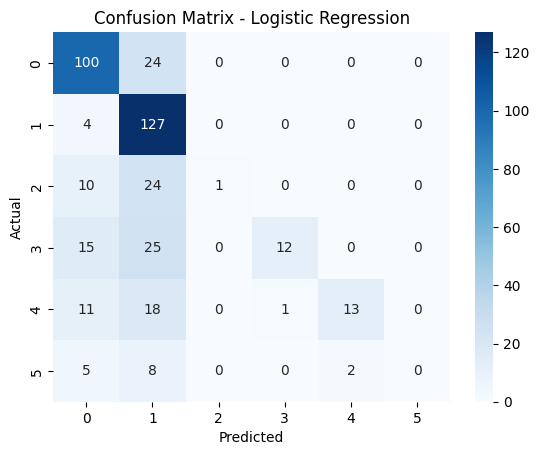

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
    --------------------------------------- 0.2/9.6 MB 7.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.6 MB 11.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.6 MB 16.4 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.6 MB 19.7 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.6 MB 23.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.0/9.6 MB 25.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.0/9.6 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------  9.6/9.6 MB 26.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 24.4 MB/s eta 0:00:00
   ------

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import streamlit as st

# Function to clean input text
def clean_text_streamlit(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    return ' '.join(text)

# Streamlit App
st.title("Emotion Detection from Text")
st.write("Enter a sentence to detect its emotion!")

user_input = st.text_area("Your Text", "I am feeling happy today!")
if st.button("Predict Emotion"):
    cleaned_input = clean_text_streamlit(user_input)
    vectorized_input = vectorizer.transform([cleaned_input]).toarray()
    prediction = label_encoder.inverse_transform(lr_model.predict(vectorized_input))
    st.write(f"Predicted Emotion: {prediction[0]}")


2025-02-07 12:49:44.057 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 12:49:44.139 
  command:

    streamlit run C:\Users\Rhea Dmello\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-07 12:49:44.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 12:49:44.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 12:49:44.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 12:49:44.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 12:49:44.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 12:49:44.14

In [26]:
import pandas as pd
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv("emotion_sentimen_dataset.csv")  # Ensure file is in the working directory

# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    return ' '.join(text)

# Apply text cleaning
df['cleaned_text'] = df['Emotion'].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['Emotion'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['encoded_label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization with Bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)  # Unigrams & Bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Save model, vectorizer, and label encoder
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
pickle.dump(lr_model, open("model.pkl", "wb"))
pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))

print("Model training complete and files saved!")



[nltk_data] Downloading package stopwords to C:\Users\Rhea
[nltk_data]     Dmello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rhea
[nltk_data]     Dmello\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model training complete and files saved!
